In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import turicreate as tc
random.seed(0)

# Defining dataset

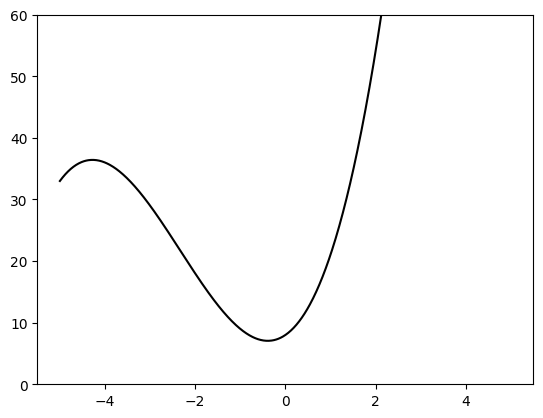

In [2]:
# Getting the coefficients from polynomial and inserting in a list by index
# Polynomial f(x) = 1*x^3+7*x^2+5*x+8
coefs = [8, 5, 7, 1]

# Function returning the sum of coefficients within exponentials
def polynomial(coefs, x):
    n = len(coefs)
    return sum([coefs[i]*x**i for i in range(n)])

# Function to plot the graph
def draw_polynomial(coefs):
    n = len(coefs)
    x = np.linspace(-5, 5, 1000)
    plt.ylim(0,60)
    plt.plot(x, sum([coefs[i]*x**i for i in range(n)]), linestyle='-', color='black')

draw_polynomial(coefs)

In [3]:
# This line generates a dataset of 500 points, also evaluates a polynomial function with added Gaussian noise.
X = []
Y = []
for i in range(500):
    x = random.uniform(-5, 5)
    y = polynomial(coefs, x) + random.gauss(0,7)
    X.append(x)
    Y.append(y)

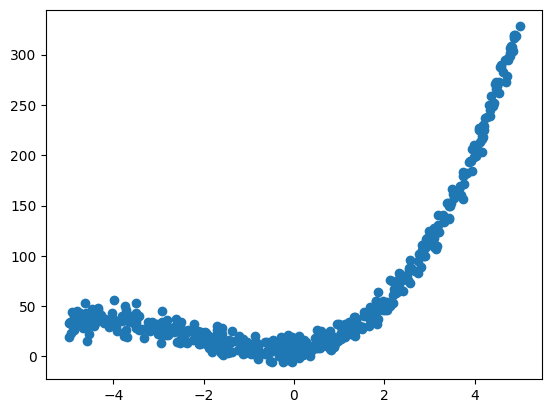

In [4]:
# Calling matplotlib libary to creates a scatter plot that generated dataset, where each point represents an (x, y)
plt.scatter(X, Y)
#draw_polynomial(coefs)

# Training a polynomial regression model

In [5]:
# With TuriCreate library using the dataframe to create an object named data with two columns, 'x' and 'y', 
data = tc.SFrame({'x':X, 'y':Y})
data

x,y
3.4442185152504816,149.48245315445465
-2.4108324970703663,15.314736307716354
0.11274721368608542,-1.4757090420423715
-1.9668727392107255,24.527110759818314
-0.23403045847644144,-6.043323356343181
0.046868558173902564,0.5981377431554069
-2.1816215560029617,20.379091017405866
-2.4949365863755943,13.858337589431395
4.097462559682402,227.49205628530754
4.021659504395828,204.9921562076319


Adding columns to our dataset corresponding to 𝑥2,𝑥3,…,𝑥200

In [6]:
# The code iterates over a range from 2 to 10 using the for loop: for i in range(2, 11)
# it creates a string named 'string' representing the power of 'x' for the current iteration
# after the loop completes, the modified data SFrame is displayed
for i in range(2,11):
    string = 'x^'+str(i)
    data[string] = data['x'].apply(lambda x:x**i)
data

x,y,x^2,x^3,x^4
3.4442185152504816,149.48245315445465,11.862641180794233,40.85752839466433,140.72225578427518
-2.4108324970703663,15.314736307716354,5.812113328930538,-14.012031690041567,33.78066134833202
0.11274721368608542,-1.4757090420423715,0.012711934193975809,0.0014332351609316464,0.00016159327095197139
-1.9668727392107255,24.527110759818314,3.8685883722503025,-7.609021008606714,14.965975993910245
-0.23403045847644144,-6.043323356343181,0.05477025549469338,-0.012817908004294928,0.0029997808869539904
0.046868558173902564,0.5981377431554069,0.002196661745300489,0.0001029543687980023,4.82532282326659e-06
-2.1816215560029617,20.379091017405866,4.759472613616784,-10.38336804907213,22.652579559768178
-2.4949365863755943,13.858337589431395,6.224708570035504,-15.530253150907287,38.74699678187344
4.097462559682402,227.49205628530754,16.789199427999062,68.79311606326735,281.877217433124
4.021659504395828,204.9921562076319,16.173745169297295,65.04529598178058,261.5900328013676


# Splitting data into training, validation and testing

In [7]:
# It divides the original dataset data into three subsets: training, validation, and test,
# Also, creating a training data, which is 70%, and then creating validation and testing data, 20% and 10%.
train, rest = data.random_split(0.7, seed=0)
validation, test = rest.random_split(0.2/0.3, seed=0)

In [8]:
# The display_results() function evaluates and prints the training and validation errors of the given model,
# visualizes the training and validation datasets,
# plots the polynomial curve based on the model's coefficients, and prints out the polynomial coefficients themselves.
def display_results(model):
    coefs = model.coefficients
    print("Training error (rmse):", model.evaluate(train)['rmse'])
    print("Validation error (rmse):", model.evaluate(validation)['rmse'])
    plt.scatter(train['x'], train['y'], marker='o')
    plt.scatter(validation['x'], validation['y'], marker='^')
    draw_polynomial(coefs['value'])
    plt.show()
    print("Polynomial coefficients")
    print(coefs['name', 'value'])

# Training a polynomial regression model with elastic regularization

In [9]:
# It creates a linear regression model with elastic net regularization using the specified L1=0.1
# and L2=0.1 penalties and trains it using the provided training dataset.
model_elastic_reg = tc.linear_regression.create(
    train, target='y', l1_penalty=0.1, l2_penalty=0.1, verbose=False, validation_set=None)

Training error (rmse): 12.576782444006575
Validation error (rmse): 12.634304373006652


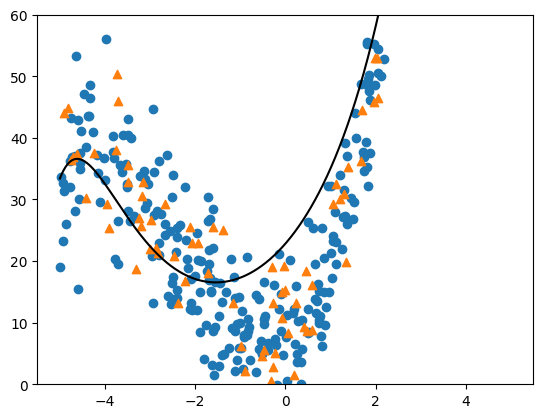

Polynomial coefficients
+-------------+------------------------+
|     name    |         value          |
+-------------+------------------------+
| (intercept) |    22.820535667929     |
|      x      |   8.453736777753504    |
|     x^2     |   3.2298450766412294   |
|     x^3     |   0.3896499197061472   |
|     x^4     |  0.10347247393005672   |
|     x^5     |  0.012237017569848857  |
|     x^6     | 0.0023881412417240773  |
|     x^7     | 0.00032859028175580876 |
|     x^8     |  2.70139083895566e-05  |
|     x^9     | 7.175031858137666e-06  |
+-------------+------------------------+
[11 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


In [10]:
# It evaluates the trained linear regression model model_elastic_reg,
# prints various metrics such as training and validation errors,
# visualizes the datasets and the polynomial curve fitted by the model,
# and prints out the polynomial coefficients.
display_results(model_elastic_reg)

# The training error and validation error are quite the same value, which means that model reached good complexity. In terms of underfitting we can see that we can still go forward and find better regularization reducing error values, clearly there is no overfitting, and we can see that in the value of training error, that is not so low, and in the graph.

# Optimal model #1

In [11]:
# The display_results() function evaluates and prints the training and validation errors of the given model,
# visualizes the training and validation datasets,
# plots the polynomial curve based on the model's coefficients, and prints out the polynomial coefficients themselves.
def display_results(model):
    coefs = model.coefficients
    print("Training error (rmse):", model.evaluate(train)['rmse'])
    print("Validation error (rmse):", model.evaluate(validation)['rmse'])
    plt.scatter(train['x'], train['y'], marker='o')
    plt.scatter(validation['x'], validation['y'], marker='^')
    draw_polynomial(coefs['value'])
    plt.show()
    print("Polynomial coefficients")
    print(coefs['name', 'value'])

In [12]:
# These lists represents different sets of hyperparameters for regularization
l1_list = [0.0000001, 0.0000002, 0.0000003]
l2_list = [0.01, 0.02, 0.03]
n_list = [1.1, 2.2, 3.3]

In [13]:
# It performs an exhaustive search through combinations of hyperparameters l1, l2, and n,
# trains the linear regression model (Optimal model #1) for each combination,
# and prints out information about the combination being used
for l1 in l1_list:
    for l2 in l2_list:
        for n in n_list:
            optimal_model = tc.linear_regression.create(train, target='y', 
                                                        l1_penalty=0.1 * l1, l2_penalty=0.4 * l2 * n, 
                                                        verbose=False, validation_set=None)

Training error (rmse): 12.573374406288114
Validation error (rmse): 12.631715069585352


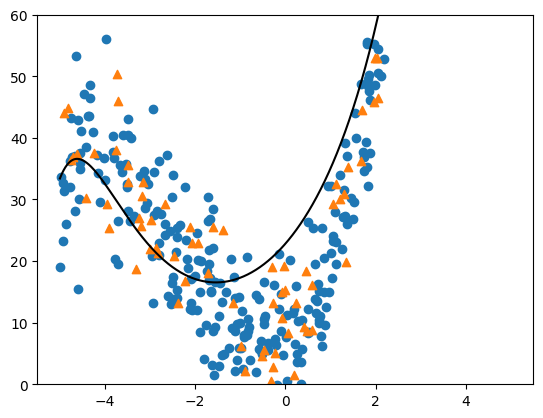

Polynomial coefficients
+-------------+------------------------+
|     name    |         value          |
+-------------+------------------------+
| (intercept) |   22.81648886101958    |
|      x      |   8.455014846716445    |
|     x^2     |   3.230687356718266    |
|     x^3     |  0.38969008623396467   |
|     x^4     |  0.10348914348146603   |
|     x^5     |  0.012237120251275149  |
|     x^6     | 0.0023880677521410346  |
|     x^7     | 0.00032853460833387113 |
|     x^8     | 2.6984920032489383e-05 |
|     x^9     | 7.170743120868692e-06  |
+-------------+------------------------+
[11 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


In [14]:
# evaluates the trained linear regression model (optimal_model #1),
# prints various metrics such as training and validation errors,
# visualizes the datasets and the polynomial curve fitted by the model, and prints out the polynomial coefficients.
display_results(optimal_model)

# Optimal model #2

In [15]:
# It performs an exhaustive search through combinations of hyperparameters l1, l2, and n,
# trains the linear regression model (Optimal model #2) for each combination,
# and prints out information about the combination being used
for l1 in l1_list:
    for l2 in l2_list:
        for n in n_list:
            optimal_model = tc.linear_regression.create(train, target='y', 
                                                        l1_penalty=0.0000001 * l1, 
                                                        l2_penalty= 3 * l2 * l2 * n * n * n, 
                                                        verbose=False, validation_set=None)

Training error (rmse): 6.952142612154789
Validation error (rmse): 7.847244127870532


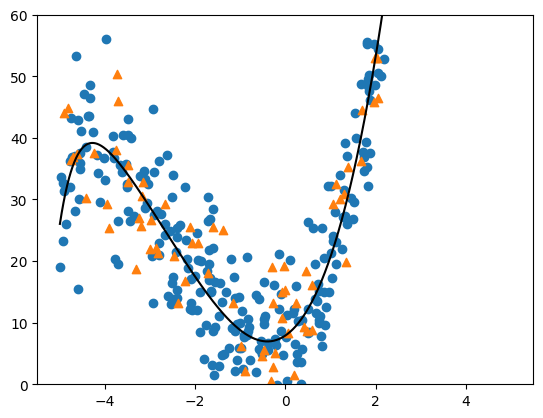

Polynomial coefficients
+-------------+-------------------------+
|     name    |          value          |
+-------------+-------------------------+
| (intercept) |    7.912724072217401    |
|      x      |    4.963821059713257    |
|     x^2     |    6.814040524512197    |
|     x^3     |    0.9730666241472506   |
|     x^4     |  0.0007950556765797258  |
|     x^5     |   0.004175668580519168  |
|     x^6     |   0.001271656370105438  |
|     x^7     | -0.00025606938979452765 |
|     x^8     |  8.665435220817633e-05  |
|     x^9     |  6.605548286389414e-06  |
+-------------+-------------------------+
[11 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


In [16]:
# evaluates the trained linear regression model (optimal_model #2),
# prints various metrics such as training and validation errors,
# visualizes the datasets and the polynomial curve fitted by the model, and prints out the polynomial coefficients.
display_results(optimal_model)

# Optimal model #3

In [17]:
# It performs an exhaustive search through combinations of hyperparameters l1, l2, and n,
# trains the linear regression model (Optimal model #3) for each combination,
# and prints out information about the combination being used
for l1 in l1_list:
    for l2 in l2_list:
        for n in n_list:
            optimal_model = tc.linear_regression.create(train, target='y', 
                                                        l1_penalty=0.00000001 * l1, 
                                                        l2_penalty=3 * l2 * l2 * l2 * n * n, 
                                                        verbose=False, validation_set=None)

Training error (rmse): 6.923158781526622
Validation error (rmse): 7.8099891186532


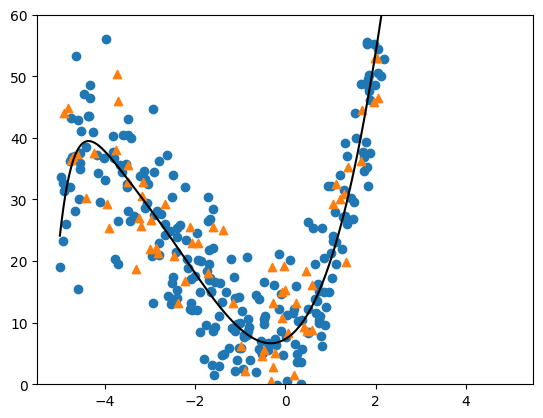

Polynomial coefficients
+-------------+------------------------+
|     name    |         value          |
+-------------+------------------------+
| (intercept) |   7.340547286015607    |
|      x      |   4.293856462695623    |
|     x^2     |   7.176721950507151    |
|     x^3     |   1.2599738970531593   |
|     x^4     |  0.018867718198779686  |
|     x^5     | -0.030262619045649315  |
|     x^6     | -0.010866700138324779  |
|     x^7     | 0.0013415320274589877  |
|     x^8     | 0.0009874986307822787  |
|     x^9     | -1.895269798700744e-05 |
+-------------+------------------------+
[11 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


In [18]:
# evaluates the trained linear regression model (optimal_model #3),
# prints various metrics such as training and validation errors,
# visualizes the datasets and the polynomial curve fitted by the model, and prints out the polynomial coefficients.
display_results(optimal_model)

# The least errors were verified in optimal model index number 3. It is possible to see in the graph that line fits data making two oscillations (degree 3). There are 3 weights, with values above 10, positives, and one bias, with value also above 10. 

# The optimal model is better and this is shown comparing the testing errors. Also training error and testing error from the optimal model are low, meaning that model got a good complexity level, not so high nor so low, to underfit.

In [19]:
# evaluates and compares the RMSE of two different models, 'model_elastic_reg' and 'optimal_model'
print("Model_elastic_reg:", model_elastic_reg.evaluate(test)['rmse'])
print("Optimal_model:", optimal_model.evaluate(test)['rmse'])

Model_elastic_reg: 11.129064154596335
Optimal_model: 6.6925477846007455


Training error (rmse): 12.576782444006575
Validation error (rmse): 12.634304373006652


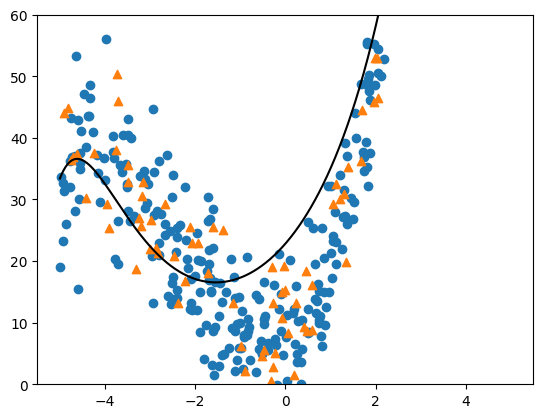

Polynomial coefficients
+-------------+------------------------+
|     name    |         value          |
+-------------+------------------------+
| (intercept) |    22.820535667929     |
|      x      |   8.453736777753504    |
|     x^2     |   3.2298450766412294   |
|     x^3     |   0.3896499197061472   |
|     x^4     |  0.10347247393005672   |
|     x^5     |  0.012237017569848857  |
|     x^6     | 0.0023881412417240773  |
|     x^7     | 0.00032859028175580876 |
|     x^8     |  2.70139083895566e-05  |
|     x^9     | 7.175031858137666e-06  |
+-------------+------------------------+
[11 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


In [20]:
# It evaluates the trained linear regression model model_elastic_reg,
# prints various metrics such as training and validation errors,
# visualizes the datasets and the polynomial curve fitted by the model,
# and prints out the polynomial coefficients.
display_results(model_elastic_reg)

Training error (rmse): 6.923158781526622
Validation error (rmse): 7.8099891186532


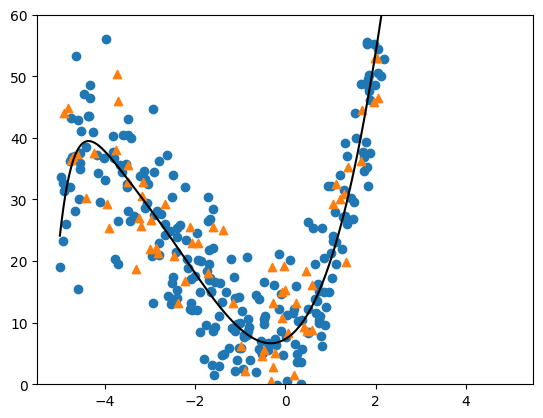

Polynomial coefficients
+-------------+------------------------+
|     name    |         value          |
+-------------+------------------------+
| (intercept) |   7.340547286015607    |
|      x      |   4.293856462695623    |
|     x^2     |   7.176721950507151    |
|     x^3     |   1.2599738970531593   |
|     x^4     |  0.018867718198779686  |
|     x^5     | -0.030262619045649315  |
|     x^6     | -0.010866700138324779  |
|     x^7     | 0.0013415320274589877  |
|     x^8     | 0.0009874986307822787  |
|     x^9     | -1.895269798700744e-05 |
+-------------+------------------------+
[11 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


In [21]:
# evaluates the trained linear regression model (optimal_modelS),
# prints various metrics such as training and validation errors,
# visualizes the datasets and the polynomial curve fitted by the model, and prints out the polynomial coefficients.
display_results(optimal_model)